<a href="https://colab.research.google.com/github/yyashaswini736/in2/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

confusion matrix:
 [[6 0]
 [0 2]]
accuracy: 1.0
prediction for age=30,salary=87000: [0]


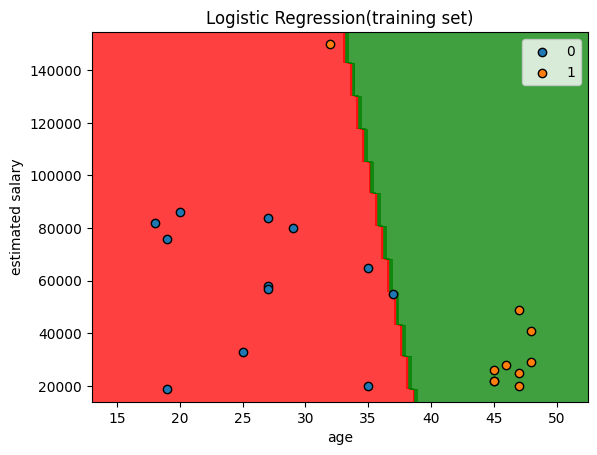

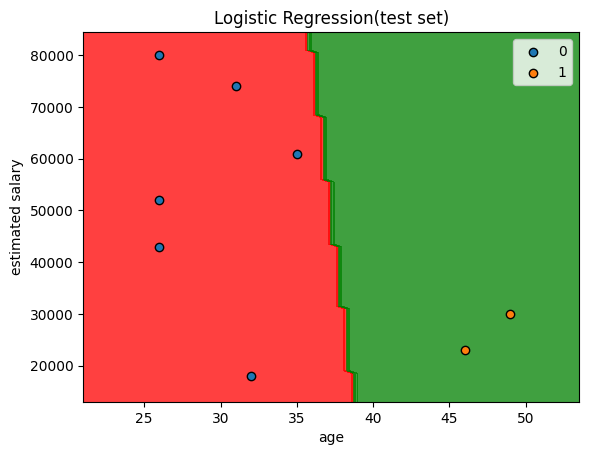

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
dataset=pd.read_csv('/content/age.csv')
x=dataset.iloc[:,1:-1].values
y=dataset.iloc[:,-1].values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import confusion_matrix,accuracy_score
print("confusion matrix:\n",confusion_matrix(y_test,y_pred))
print("accuracy:",accuracy_score(y_test,y_pred))
print("prediction for age=30,salary=87000:",model.predict(sc.transform([[30,87000]])))
from matplotlib.colors import ListedColormap
def plot_decision_boundary(x,y,title):
  x=sc.inverse_transform(x)
  x1,x2=np.meshgrid(
      np.arange(x[:,0].min()-5,x[:,0].max()+5,0.5),
      np.arange(x[:,1].min()-5000,x[:,1].max()+5000,500)
  )
  plt.contourf(
      x1,x2,model.predict(sc.transform(np.c_[x1.ravel(),x2.ravel()]))
      .reshape(x1.shape),
      alpha=0.75,
      cmap=ListedColormap(('red','green'))
  )
  for i in np.unique(y):
    plt.scatter(x[y==i,0],x[y==i,1],label=i,edgecolor='k')
  plt.title(title)
  plt.xlabel('age')
  plt.ylabel("estimated salary")
  plt.legend()
  plt.show()
plot_decision_boundary(x_train,y_train,"Logistic Regression(training set)")
plot_decision_boundary(x_test,y_test,"Logistic Regression(test set)")